In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

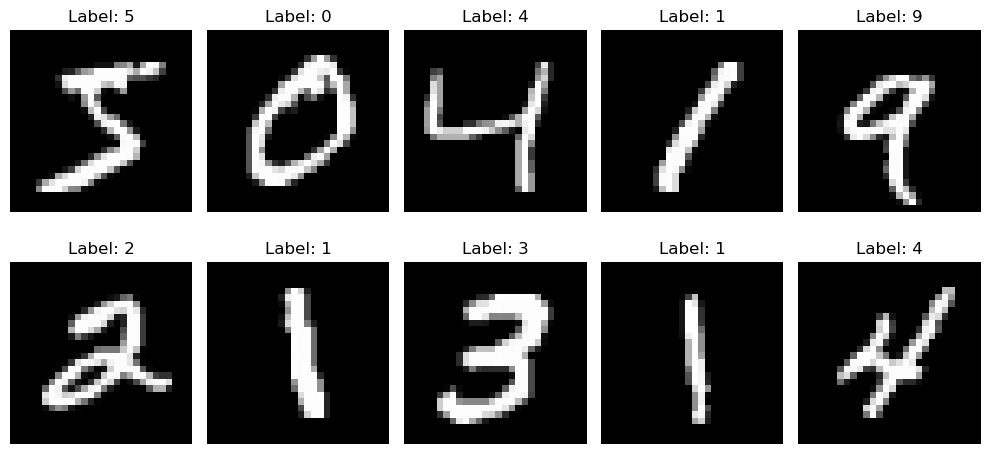

In [2]:
# Load the MNIST dataset
X, y = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
fig, axs = plt.subplots(2, 5, figsize=(10, 5))  # Create a 5x2 grid of subplots
for i in range(10):
    row = i // 5  # Calculate row index
    col = i % 5  # Calculate column index
    axs[row, col].imshow(X[i].reshape(28, 28), cmap='gray')  # Display image in subplot
    axs[row, col].set_title(f'Label: {y[i]}')  # Set title of subplot to label of image
    axs[row, col].axis('off')  # Hide axes
plt.tight_layout()  # Ensure subplots do not overlap
plt.show()  # Display the grid of subplots

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Standardize features
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Create MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(25, 25, 25), max_iter=1000)  # 3 hidden layers with 100 neurons each

# Train the model
mlp.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = mlp.predict(X_test)

# Model Accuracy
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1359    0    4    2    1    1    5    3    3    2]
 [   1 1590   13    6    1    0    3    6   11    1]
 [   1    1 1402    8    4    1    1    6    9    0]
 [   1    1    8 1389    0    8    1    9    8    6]
 [   1    3    4    1 1294    0    4    7    2   12]
 [   3    0    1    8    2 1262   11    1    4    5]
 [   2    1    1    0    3    8 1309    1    6    0]
 [   1    0    3    0    3    1    0 1421    5   10]
 [   6    5    9    9    4    6    6    2 1297    7]
 [   2    2    3    1   16    2    1   13    4 1329]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1380
           1       0.99      0.97      0.98      1632
           2       0.97      0.98      0.97      1433
           3       0.98      0.97      0.97      1431
           4       0.97      0.97      0.97      1328
           5       0.98      0.97      0.98      1297
           6       0.98      0.98      0.98      1331
           7       0.97      0.98   

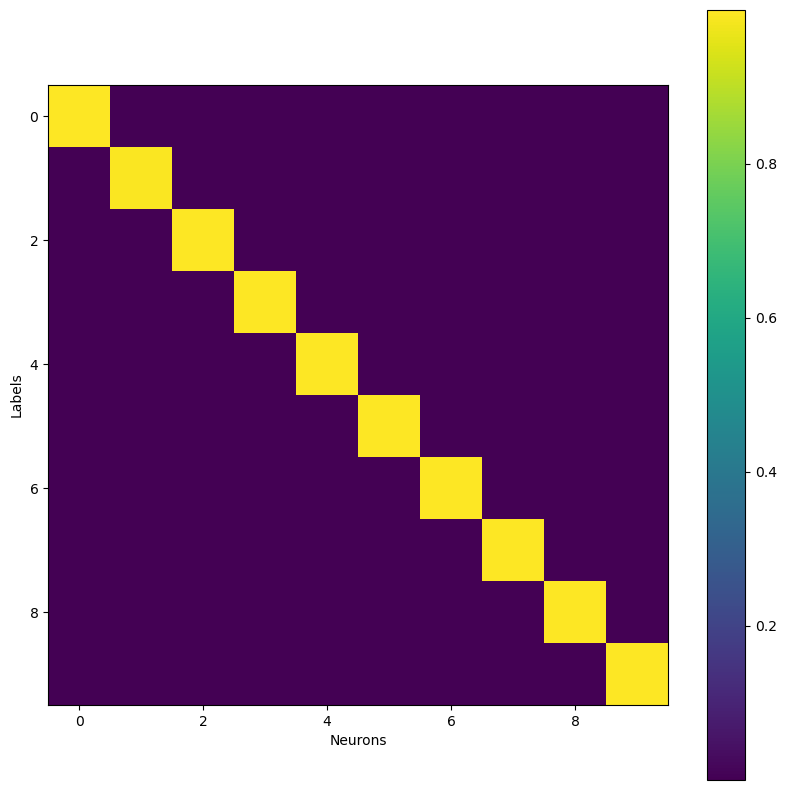

In [5]:
# Get the unique labels in the training data
unique_labels = np.unique(y_train)

# Initialize a list to store the average activations for each label
avg_activations = []

# For each unique label
for label in unique_labels:
    # Get the instances in the training data that have this label
    instances = X_train[y_train == label]

    # Get the activations of these instances (i.e., pass them through the MLP)
    activations = mlp.predict_proba(instances)

    # Calculate the average activation for this label and append to the list
    avg_activations.append(np.mean(activations, axis=0))

# Convert the list to a numpy array
avg_activations = np.array(avg_activations)

# Plot the average activations as a matrix
plt.figure(figsize=(10, 10))  # Increase the size of the figure
plt.imshow(avg_activations, cmap='viridis', interpolation='none')  # Use imshow instead of matshow
plt.colorbar()
plt.xlabel('Neurons')
plt.ylabel('Labels')
plt.show()

AttributeError: 'MLPClassifier' object has no attribute 'input'